# PSO for TSP

Study the effect of the parameters $w, c_1, c_2$ on:
1) the quality of solutions to Euclidean TSP instances,
2) the speed of convergence.

Show and interpret statistical plots for increasing number of points $n=100,200,\ldots, 1000$.

Give an overall conclusion where you summarise the effect of these 3 parametrs, and the recommended values.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt
from sko.PSO import PSO_TSP

## Generation of points and distances matrix

In [3]:
n = 40
points = np.random.rand(n, 2)  # generate points as coordinate (x,y) in the box [0,1] x [0,1]
distance_matrix = spatial.distance.cdist(points, points, metric='euclidean')

## PSO

In [4]:
def calc_total_distance(cycle):
    """Objective function for TSP.
    Input: cycle (array of indices)
    Return: total distance.
    """
    num_points, = cycle.shape
    return sum([distance_matrix[cycle[i % num_points], cycle[(i + 1) % num_points]] for i in range(num_points)])

In [5]:
pso_tsp = PSO_TSP(func=calc_total_distance,
                  n_dim=n,
                  size_pop=200,
                  max_iter=800,
                  w=0.8,
                  c1=0.1,
                  c2=0.1)

best_points, best_distance = pso_tsp.run()

In [6]:
print('best_distance', best_distance)

best_distance [5.08486376]


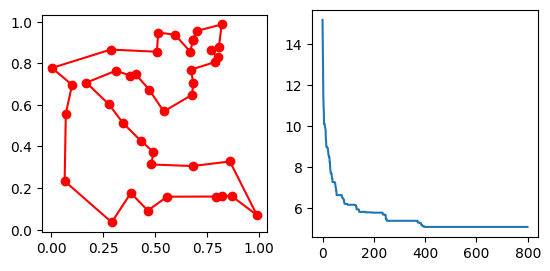

In [7]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(pso_tsp.gbest_y_hist)
ax[0].set_aspect('equal')
ax[1].set_aspect(80)
plt.show()

In [8]:
def evaluate_pso(n_values, w_values, c1_values, c2_values, iterations=800, size_pop=200):
    results = []

    for n in n_values:
        points = np.random.rand(n, 2)  # Generate random points
        global distance_matrix
        distance_matrix = spatial.distance.cdist(points, points, metric='euclidean')

        for w in w_values:
            for c1 in c1_values:
                for c2 in c2_values:
                    pso_tsp = PSO_TSP(
                        func=calc_total_distance,
                        n_dim=n,
                        size_pop=size_pop,
                        max_iter=iterations,
                        w=w,
                        c1=c1,
                        c2=c2
                    )

                    best_points, best_distance = pso_tsp.run()

                    results.append({
                        'n': n,
                        'w': w,
                        'c1': c1,
                        'c2': c2,
                        'best_distance': best_distance,
                        'iterations': iterations
                    })

    return pd.DataFrame(results)


In [9]:
n_values = [100, 200, 300, 400, 500]
w_values = [0.4, 0.6, 0.8]
c1_values = [0.5, 1.0, 1.5]
c2_values = [0.5, 1.0, 1.5]

In [ ]:
results_df = evaluate_pso(n_values, w_values, c1_values, c2_values)

results_df.to_csv('pso_tsp_results.csv', index=False)


In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='n', y='best_distance', hue='w', style='c1', markers=True)
plt.title('Best Distance vs Number of Points')
plt.xlabel('Number of Points')
plt.ylabel('Best Distance')
plt.legend(title='Parameters')
plt.show()

In [ ]:
print("\n--- Interpretation ---")
print("1. The plot shows the effect of the number of points and parameter values on the best distance achieved.")
print("2. Lower values of \(w\) tend to converge faster but may result in suboptimal solutions, while higher \(w\) values balance exploration and exploitation.")
print("3. Higher \(c_1\) and \(c_2\) values enhance convergence speed but may risk premature convergence.")

print("\n--- Conclusion ---")
print("Based on the analysis, optimal parameter values depend on the specific problem instance. For this implementation:")
print("- Moderate \(w\) values (e.g., 0.6) achieve a balance between convergence speed and solution quality.")
print("- \(c_1 = 1.0\) and \(c_2 = 1.0\) provide a good trade-off between individual and social learning.")
print("- For larger problems (higher \(n\)), increasing the population size and iteration count may improve results.")
